#Exercise Data Exploration
##Final Project Prep

I found a pretty cool dataset form Edmonton Canada that is a survey taken about peoples exercise habits. It has attributes like: age group, children, income, transportation, volunteer, device used to take survey, employment status, born in canada, and much more. I thought it would be a great chance to look at what types of people are more or less healty/physically active and see if there is a coorelation to other areas of life.

###Some questions I'd like to answer

__Does level of excercise affect:__

1. Income
2. Employment
3. Education Level

I'm going to start with those, but I'm sure other coorelations will pop up as I dig in.

In [67]:
#Lets load up some 
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
#Load up some datas
data = pd.read_csv('../my-data/excercise-habits.csv', encoding='utf-8')

exercise_rep = {"Not at all": 0, "Once a week or less": 1, "2-3 times a week": 2.5, "4-5 times week": 4.5, "More than 5 times week": 5}
data['exercise_times_per_week'] = data['Current_Exercise_Routine_Q1'].map(exercise_rep)
income_rep = {"Prefer not to answer": 0, "$50,000 to $59,999": 55, "$60,000 to $79,999": 70, "$80,000 to $99,999": 90, "$100,000 to $149,000": 130, "$150,000 and over": 150}
data['estimated_income'] = data['Q15_Household_Income (Study: Profiling Questionnaire 2014)'].map(income_rep)
data['estimated_income'].fillna(data['estimated_income'].mean(), inplace=True)
education_rep = {"Post-graduate degree": 6, "University undergraduate degree": 4, "High school graduate": 2, "College / technical school graduate": 3, "Professional school graduate (e.g. medicine, dentistry, veterinary medicine, optometry)": 3, "Elementary/grade school graduate": 1}
data['education_enum'] = data['Q16_Education (Study: Profiling Questionnaire 2014)'].map(education_rep)
data['education_enum'].fillna(data['education_enum'].mean(), inplace=True)
employment_rep = {"Employed full-time (30+ hours a week)": 40, "Employed part-time (0-30 hours a week)": 30, "Retired": 0, "Other (Specify)": float('NaN'), "Post-secondary student": 0, "Unemployed": 0, "Homemaker": 0, "Permanently unable to Work": 0, "High School Student": 0}
data['work_week_hours'] = data['Q12_Employment_Status (Study: Profiling Questionnaire 2014)'].map(employment_rep)
data['work_week_hours'].fillna(data['work_week_hours'].mean(), inplace=True)
data

,ResponseDate,CompletionDate,Current_Exercise_Routine_Q1,Current_Exercise_Q2_On my own,Current_Exercise_Q2_With a personal trainer,Current_Exercise_Q2_In a group - with an instructor / trainer / coach,Current_Exercise_Q2_In a group - without an instructor/trainer/coach,Current_Exercise_Q2_Other:,Current_Exercise_Q3,Current_exercise_q4,...,Q14b_Secondary_Transportation (Study: Profiling Questionnaire 2014),Q15_Household_Income (Study: Profiling Questionnaire 2014),Q16_Education (Study: Profiling Questionnaire 2014),Q17_City_Employee (Study: Profiling Questionnaire 2014),FSA (Study: Profiling Questionnaire 2014),Age_Rollup_Detailed (Study: Profiling Questionnaire 2014),exercise_times_per_week,estimated_income,education_enum,work_week_hours
0,03/14/2015 05:38:00 PM,03/14/2015 05:57:00 PM,2-3 times a week,1,0,0,0,0,"I like a bit of routine and a bit of variety, ...","I have regular times that I exercise, for exam...",...,Car/truck/Van as DRIVER,"$80,000 to $99,999",Post-graduate degree,Yes,T6E,45-49,2.5,90.000000,6.000000,40.00000
1,03/11/2015 10:43:00 AM,03/11/2015 10:52:00 AM,2-3 times a week,1,0,0,0,0,I like variety. I do a variety of different ac...,I exercise at different times throughout the w...,...,Car/truck/Van as DRIVER,Prefer not to answer,University undergraduate degree,Yes,T6A,25-29,2.5,0.000000,4.000000,40.00000
2,03/13/2015 11:02:00 AM,03/13/2015 11:06:00 AM,4-5 times week,1,0,0,1,0,"I like a bit of routine and a bit of variety, ...","I have regular times that I exercise, for exam...",...,Public Transit,"$100,000 to $149,000",University undergraduate degree,Yes,T5E,30-34,4.5,130.000000,4.000000,40.00000
3,03/11/2015 10:11:00 AM,03/11/2015 10:26:00 AM,4-5 times week,1,0,0,0,0,I stick to a routine. I generally do the same ...,"I have regular times that I exercise, for exam...",...,Walk,"$150,000 and over",University undergraduate degree,Prefer not to say,T6E,55-59,4.5,150.000000,4.000000,40.00000
4,03/12/2015 11:13:00 AM,03/12/2015 11:29:00 AM,Once a week or less,1,0,0,0,0,"I like a bit of routine and a bit of variety, ...",I exercise at different times throughout the w...,...,Car/truck/Van as DRIVER,"$60,000 to $79,999",University undergraduate degree,No,T5N,25-29,1.0,70.000000,4.000000,40.00000
5,03/11/2015 10:10:00 AM,03/11/2015 10:47:00 AM,More than 5 times week,0,1,0,0,0,"I like a bit of routine and a bit of variety, ...","I have regular times that I exercise, for exam...",...,Car/truck/Van as DRIVER,Prefer not to answer,Post-graduate degree,Yes,T6E,30-34,5.0,0.000000,6.000000,40.00000
6,03/11/2015 10:34:00 AM,03/11/2015 10:39:00 AM,More than 5 times week,1,0,0,0,0,I stick to a routine. I generally do the same ...,"I have regular times that I exercise, for exam...",...,Walk,Prefer not to answer,High school graduate,No,T6E,40-44,5.0,0.000000,2.000000,40.00000
7,03/11/2015 10:21:00 AM,03/11/2015 10:28:00 AM,2-3 times a week,1,0,0,0,0,"I like a bit of routine and a bit of variety, ...",I exercise at different times throughout the w...,...,Walk,"$100,000 to $149,000",High school graduate,No,T6H,60-64,2.5,130.000000,2.000000,30.00000
8,03/11/2015 09:49:00 AM,03/11/2015 09:53:00 AM,2-3 times a week,1,0,1,0,0,"I like a bit of routine and a bit of variety, ...","I have regular times that I exercise, for exam...",...,Only have one mode of transportation,"$100,000 to $149,000",College / technical school graduate,Yes,T5X,55-59,2.5,130.000000,3.000000,40.00000
9,03/11/2015 09:49:00 AM,03/11/2015 10:01:00 AM,More than 5 times week,1,0,0,0,0,"I like a bit of routine and a bit of variety, ...","I have regular times that I exercise, for exam...",...,Car/truck/Van as DRIVER,"$100,000 to $149,000",University undergraduate degree,No,T5T,25-29,5.0,130.000000,4.000000,40.00000


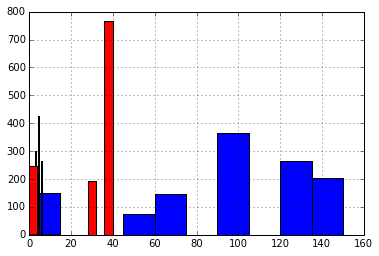

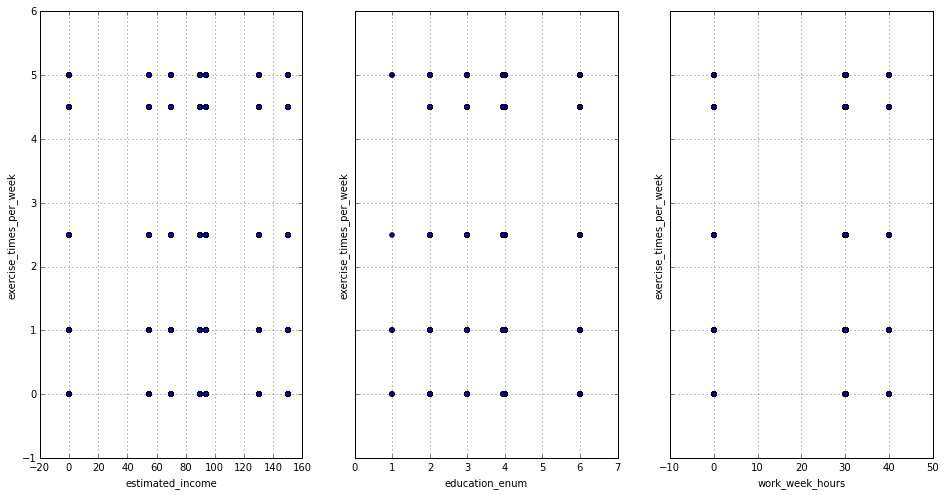

In [88]:
#Plot histos for points of interest
(data['estimated_income']).hist(bins=10)
(data['education_enum']).hist(bins=10)
(data['work_week_hours']).hist(bins=10)

#Plot some scatters
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='estimated_income', y='exercise_times_per_week', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='education_enum', y='exercise_times_per_week', ax=axs[1])
data.plot(kind='scatter', x='work_week_hours', y='exercise_times_per_week', ax=axs[2])